In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from IPython.display import VimeoVideo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
path = 'datasets/crime_training_set.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,Date,weekdays,hour,Time_of_day,Ward,Violence
0,2018-07-31 10:57:00,Tuesday,10,Morning,8.0,1
1,2018-07-23 08:55:00,Monday,8,Morning,28.0,0
2,2021-07-11 06:40:00,Sunday,6,Morning,27.0,0
3,2014-12-02 11:48:00,Tuesday,11,Morning,37.0,1
4,2010-06-30 01:00:00,Wednesday,1,Morning,26.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055884 entries, 0 to 1055883
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Date         1055884 non-null  object 
 1   weekdays     1055884 non-null  object 
 2   hour         1055884 non-null  int64  
 3   Time_of_day  998893 non-null   object 
 4   Ward         1055853 non-null  float64
 5   Violence     1055884 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 48.3+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Date           0
weekdays       0
hour           0
Time_of_day    0
Ward           0
Violence       0
dtype: int64

In [8]:
df['Ward'] = df.Ward.astype('category')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.describe()

,hour,Violence
count,998865.000000,998865.000000
mean,13.810561,0.373419
std,6.036491,0.483712
min,1.000000,0.000000
25%,10.000000,0.000000
50%,14.000000,0.000000
75%,19.000000,1.000000
max,23.000000,1.000000


In [11]:
df.describe(include=['O','category'])

,weekdays,Time_of_day,Ward
count,998865,998865,998865.0
unique,7,3,50.0
top,Friday,Evening,42.0
freq,150367,437170,48565.0


In [23]:
df.groupby('weekdays',as_index=False)['Violence'].agg(['sum','count']).reset_index().sort_values(['sum','count'])

,weekdays,sum,count
3,Sunday,51015,136462
5,Tuesday,52870,142046
1,Monday,53063,141605
2,Saturday,53379,143022
4,Thursday,53390,142148
6,Wednesday,53408,143215
0,Friday,55870,150367


In [12]:
df.Violence.value_counts(normalize=True)

0    0.626581
1    0.373419
Name: Violence, dtype: float64

In [13]:
target = 'Violence'
X = df[['Ward','weekdays','Time_of_day']]
y= df[target]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X,y, test_size=0.2,random_state=42
)

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6267


In [16]:
# Build Model
model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(random_state=42,max_depth=6))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Ward', 'weekdays', 'Time_of_day'],
                                mapping=[{'col': 'Ward',
                                          'data_type': CategoricalDtype(categories=[ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
                  11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0,
                  21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0,
                  31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0,
                  41.0, 42...
36.0    46
45.0    47
1.0     48
18.0    49
22.0    50
NaN     -2
dtype: int64},
                                         {'col': 'weekdays',
                                          'data_type': dtype('O'),
                                          'mapping': Sunday       1
Wednesday    2
Friday       3
Thursday     4
Saturday     5
Tuesday      6
Monday       7
NaN         -2
dtype: int64},
                                         {'col': 'Time_of_day',
                                          'data_type': dtype('O'),
                                          'mapping': Evening      1
Morning      2
Afternoon    3
NaN         -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [17]:
acc_train = model.score(X_train,y_train)
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_val, 4))

Training Accuracy: 0.6267
Validation Accuracy: 0.626


In [18]:
tree_depth = model.named_steps['decisiontreeclassifier'].get_depth()
print("Tree Depth:", tree_depth)
model.named_steps['decisiontreeclassifier'].get_n_leaves()

Tree Depth: 6


62

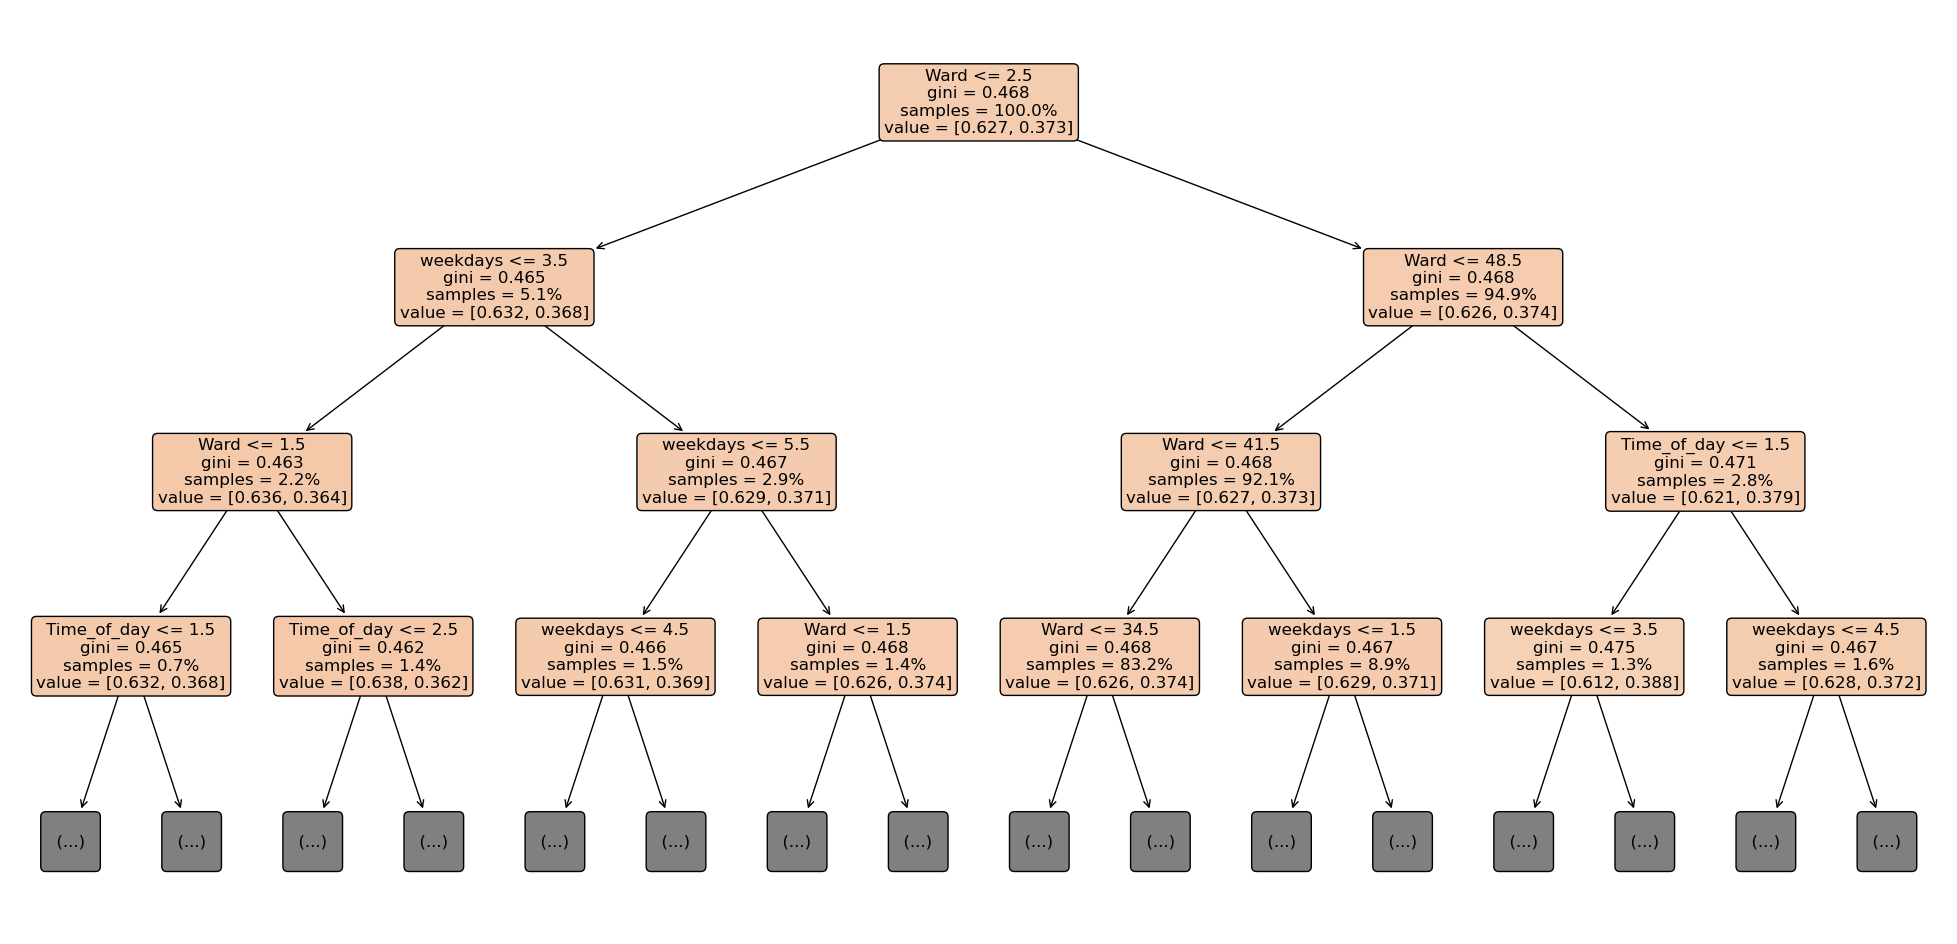

In [19]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [20]:
features = X_train.columns
importances = model.named_steps['decisiontreeclassifier'].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Ward', 'weekdays', 'Time_of_day'], dtype='object')
Importances: [0.38528105 0.39697221 0.21774674]


In [21]:
feat_imp = pd.Series(importances,index=features)
feat_imp.head()

Ward           0.385281
weekdays       0.396972
Time_of_day    0.217747
dtype: float64

Text(0, 0.5, 'Feature')

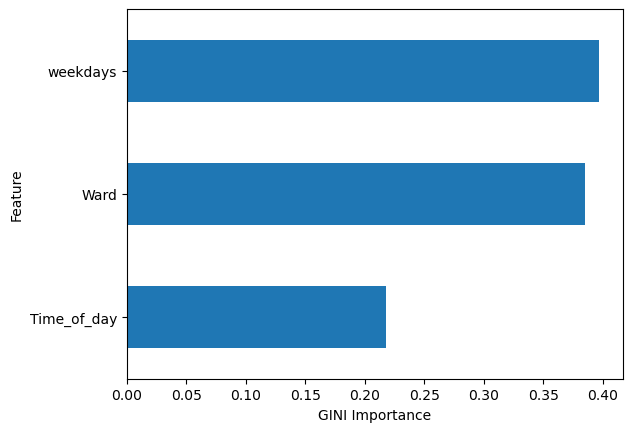

In [22]:
# Create horizontal bar chart
feat_imp.sort_values().plot(kind='barh')
plt.xlabel('GINI Importance')
plt.ylabel('Feature')

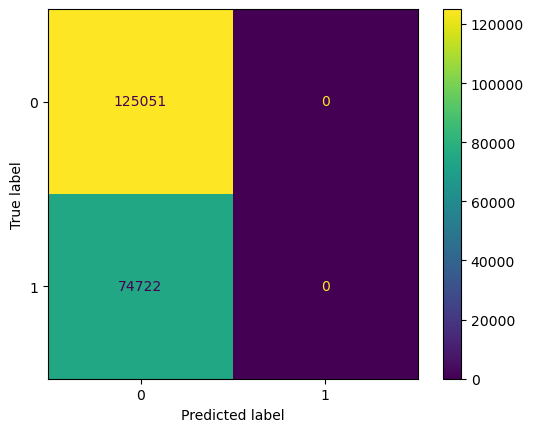

In [23]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)

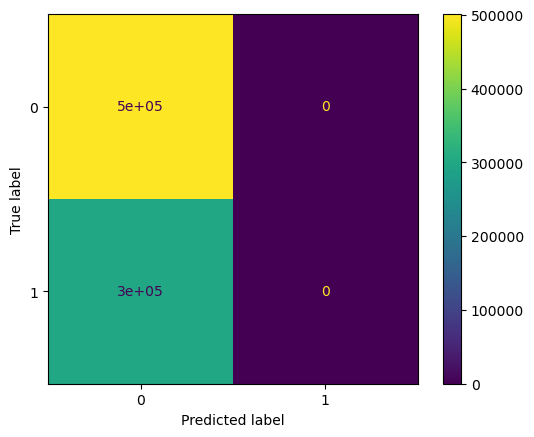

In [24]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)

In [25]:
# hyper param tuning
depth_hyperparams = list(range(1,6,1))

In [26]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(random_state=42,max_depth=d))
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6267350943320669, 0.6267350943320669, 0.6267350943320669]
Validation Accuracy Scores: [0.6259654708093686, 0.6259654708093686, 0.6259654708093686]


In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799092, 3)
y_train shape: (799092,)
X_test shape: (199773, 3)
y_test shape: (199773,)


In [29]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_under.shape)
X_train_under.head()

X_train_over shape: (596546, 3)


,Ward,weekdays,Time_of_day
0,15.0,Wednesday,Evening
1,37.0,Saturday,Morning
2,20.0,Wednesday,Evening
3,18.0,Monday,Evening
4,33.0,Friday,Evening


In [30]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (1001638, 3)


,Ward,weekdays,Time_of_day
0,10.0,Sunday,Evening
1,2.0,Wednesday,Morning
2,4.0,Friday,Morning
3,42.0,Wednesday,Afternoon
4,16.0,Sunday,Afternoon


In [31]:
y_train_over.value_counts()

0    500819
1    500819
Name: Violence, dtype: int64

In [32]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6267


In [33]:
clf = make_pipeline(OrdinalEncoder(),RandomForestClassifier(random_state=42,))
clf

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [34]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=2,n_jobs=-1,verbose=1)
print(cv_acc_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[0.50295216 0.50456952]


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.9min finished


In [35]:
params = {
    'randomforestclassifier__n_estimators':range(1,66,13),
    'randomforestclassifier__max_depth': range(2,6,2),
}

In [36]:
model = GridSearchCV(
    clf,
    param_grid = params,
    cv=5,
    n_jobs = -1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(2, 6, 2),
                         'randomforestclassifier__n_estimators': range(1, 66, 13)},
             verbose=1)

In [37]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(2, 6, 2),
                         'randomforestclassifier__n_estimators': range(1, 66, 13)},
             verbose=1)

In [38]:
cv_results = pd.DataFrame().from_dict(model.cv_results_).sort_values('rank_test_score')
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,44.662484,2.205621,1.529260,0.135839,4,53,"{'randomforestclassifier__max_depth': 4, 'rand...",0.501757,0.500739,0.500804,0.502723,0.502149,0.501634,0.000769,1
8,35.418678,0.875609,1.286716,0.035582,4,40,"{'randomforestclassifier__max_depth': 4, 'rand...",0.501348,0.500644,0.500040,0.503033,0.501660,0.501345,0.001014,2
6,13.989585,0.293771,0.664955,0.038095,4,14,"{'randomforestclassifier__max_depth': 4, 'rand...",0.501667,0.499551,0.500779,0.502658,0.502064,0.501344,0.001085,3
7,24.088700,0.635058,0.966047,0.007495,4,27,"{'randomforestclassifier__max_depth': 4, 'rand...",0.501657,0.500349,0.500349,0.502119,0.502129,0.501321,0.000811,4
1,9.852509,0.337861,0.651606,0.023528,2,14,"{'randomforestclassifier__max_depth': 2, 'rand...",0.501682,0.498832,0.500469,0.502164,0.500866,0.500803,0.001151,5
4,29.776210,0.869246,1.414456,0.058309,2,53,"{'randomforestclassifier__max_depth': 2, 'rand...",0.500489,0.499151,0.500489,0.502184,0.501440,0.500751,0.001022,6
3,23.984614,1.120306,1.172101,0.020282,2,40,"{'randomforestclassifier__max_depth': 2, 'rand...",0.500784,0.498902,0.500130,0.502613,0.501076,0.500701,0.001214,7
2,16.514054,0.413701,0.908368,0.019552,2,27,"{'randomforestclassifier__max_depth': 2, 'rand...",0.501562,0.498822,0.500240,0.502733,0.500052,0.500682,0.001344,8
5,3.838365,0.100969,0.361202,0.026514,4,1,"{'randomforestclassifier__max_depth': 4, 'rand...",0.499970,0.499845,0.502141,0.500607,0.500607,0.500634,0.000817,9
0,3.404469,0.112977,0.363224,0.026313,2,1,"{'randomforestclassifier__max_depth': 2, 'rand...",0.500933,0.500419,0.499910,0.500037,0.500167,0.500294,0.000362,10
